<a href="https://colab.research.google.com/github/Tom-D04/TP-Stereovision/blob/main/St%C3%A9r%C3%A9ovision_DUNAND_MATHIEU_METAIS_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L’objectif de ce TP est de s'initier à la reconstruction 3D à travers toutes ses étapes : de l’acquisition aux résultats, du calibrage à la carte de profondeur. Il y aura donc une partie acquisition, puis une
partie traitement d’images.

# **1 Calibrage de la caméra**

## 1.1 Acquisition

Nous avons pris 15 images pour chaque caméra de la mire telles que les suivantes :

- Caméra rouge (Droite)

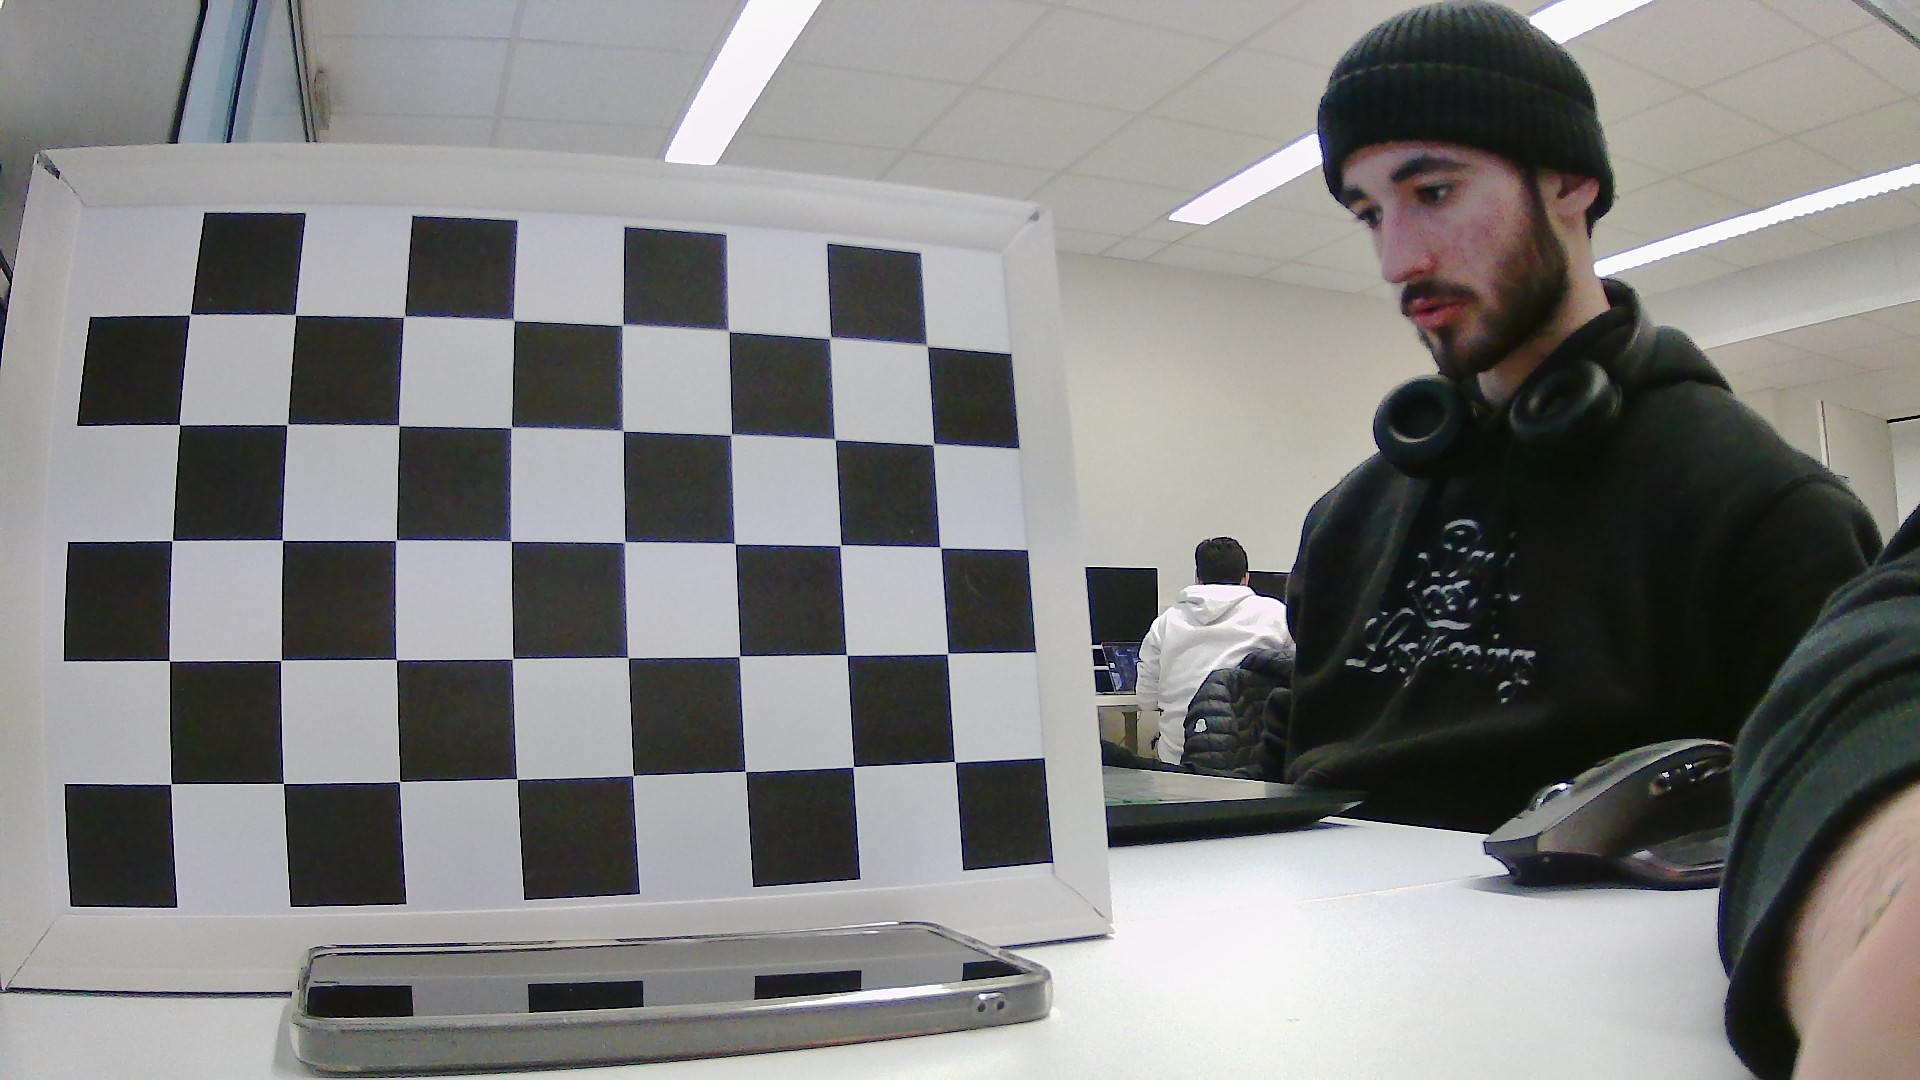

- Caméra Bleue (Gauche)

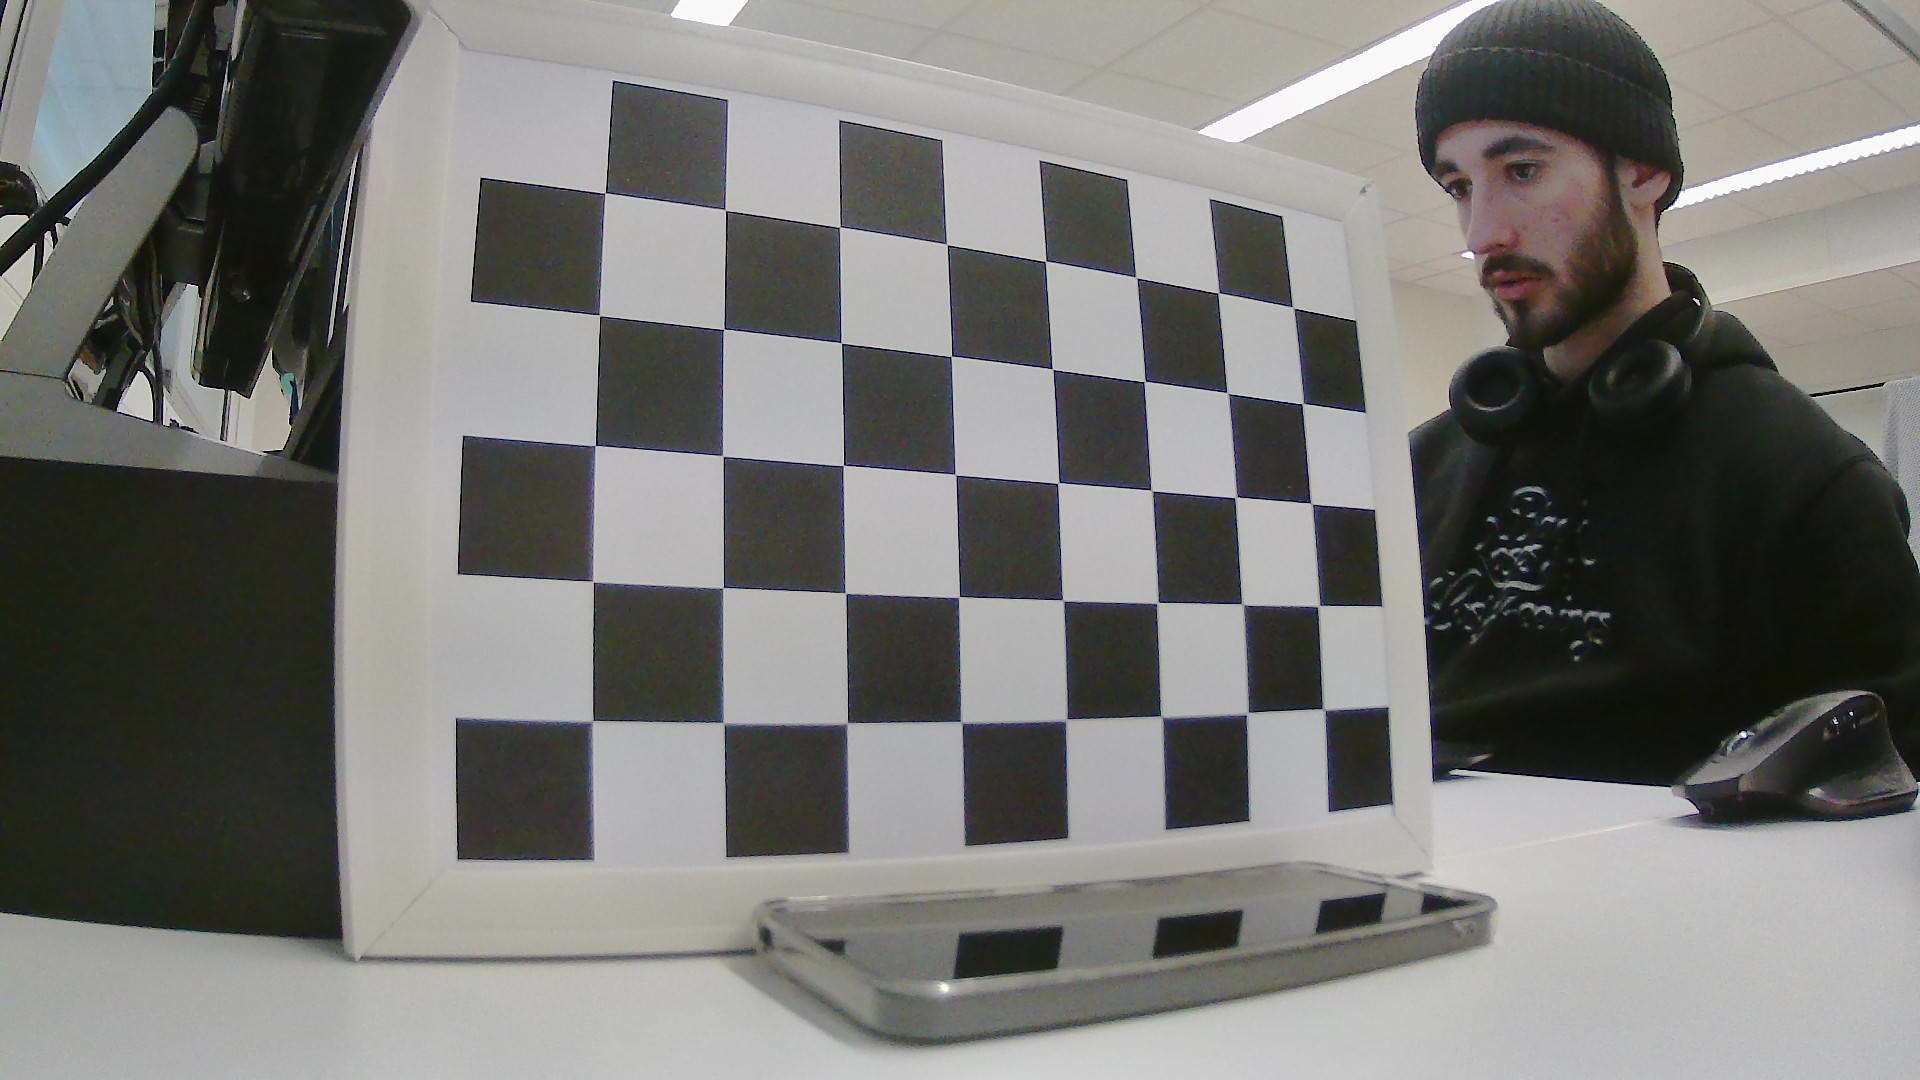

Les images démontrent aussi la concentration du groupe.




## 1.2 Estimation de la matrice de la caméra

In [ ]:
def CameraCalibration(Size,path,path1image, savename):
    #
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    ############ to adapt ##########################
    objp = np.zeros((Size[0]*Size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:Size[0], 0:Size[1]].T.reshape(-1, 2)
    #
    objp[:, :2] *= 40
    #################################################
    #
    objpoints = []  #
    imgpoints = []  #
    ############ to adapt ##########################
    images = glob.glob(path)
    #################################################
    for fname in images:
        img = cv.imread(fname)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        #
        ############ to adapt ##########################
        ret, corners = cv.findChessboardCorners(gray, (Size[0],Size[1]), None)
        #################################################
        print(ret)
        #
        if ret == True:
            objpoints.append(objp)
            corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            imgpoints.append(corners)
            #
            ############ to adapt ##########################
            cv.drawChessboardCorners(img, Size, corners2, ret)
            #################################################
            cv.namedWindow('img', 0 )
            cv.imshow('img', img)
            cv.waitKey(500)
    cv.destroyAllWindows()

    #
    ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    print('camraMatrix\n',mtx)
    print('dist\n',dist)

    ############ to adapt ##########################
    img = cv.imread(path1image)
    #################################################
    h, w = img.shape[:2]
    newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    print('newcameramtx\n',newcameramtx)

    #
    mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), 5)
    dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
    #
    x, y, w, h = roi
    dst = dst[y:y + h, x:x + w]
    cv.namedWindow('img', cv.WINDOW_KEEPRATIO)
    cv.imshow('img', dst)
    cv.waitKey(0)
    ############ to adapt ##########################
    cv.imwrite(savename, dst)
    #################################################

    mean_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2) / len(imgpoints2)
        mean_error += error
    print("total error: {}".format(mean_error / len(objpoints)))

    return newcameramtx, dst

In [ ]:
if __name__ == "__main__" :


## 1.3 Analyse des résultats


— Quels phénomènes peuvent engendrer la déformation de la figure 2d ?

— Commenter les résultats obtenus avec vos images. Illustrer l’étape de rectification sur vos images
résultats.

— Comparer les matrices de calibrage obtenues entre les deux webcams.